In [1]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
facemeshCoords = pd.read_json("generateData_OUTPUT/GOPR1124_Trim_trainingsData.json", orient='index')

In [3]:
facemeshCoords.head()

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
1,"[[0.5573291778564451, 0.652587234973907, -0.04...","[[0.557957172393798, 0.5567219257354731, -0.07...","[[0.553840219974517, 0.5824950933456421, -0.04...","[[0.546826839447021, 0.464279949665069, -0.058...","[[0.55938047170639, 0.5293174982070921, -0.081...","[[0.559927284717559, 0.49271073937416004, -0.0...","[[0.559869349002838, 0.403670668601989, -0.036...","[[0.45857012271881104, 0.384479343891143, 0.01...","[[0.5609523057937621, 0.34093707799911505, -0....","[[0.562165796756744, 0.309178739786148, -0.027...",...,"[[0.48136761784553506, 0.37362134456634505, 0....","[[0.49637186527252203, 0.37301516532897905, 0....","[[0.48121842741966203, 0.350842416286468, 0.00...","[[0.466245770454406, 0.374146282672882, 0.0059...","[[0.48144170641899103, 0.39627057313919, 0.005...","[[0.6204403638839721, 0.38572287559509205, 0.0...","[[0.635969758033752, 0.388736516237258, 0.0211...","[[0.6218578815460201, 0.36289998888969405, 0.0...","[[0.604714214801788, 0.38255345821380604, 0.02...","[[0.619118630886077, 0.40839606523513705, 0.02..."
2,"[[0.558201551437377, 0.6541500091552731, -0.04...","[[0.558665215969085, 0.555732190608978, -0.076...","[[0.554659783840179, 0.581495344638824, -0.040...","[[0.548686623573303, 0.463388293981552, -0.058...","[[0.560278058052063, 0.528305172920227, -0.080...","[[0.5611944198608391, 0.49183303117752003, -0....","[[0.5619571805000301, 0.40312665700912403, -0....","[[0.45836025476455605, 0.38251179456710804, 0....","[[0.563414871692657, 0.340867459774017, -0.026...","[[0.5648844242095941, 0.30830162763595503, -0....",...,"[[0.48149797320365906, 0.37385708093643105, 0....","[[0.49673753976821905, 0.37373691797256403, 0....","[[0.48155635595321605, 0.35092270374298, 0.004...","[[0.46615344285964905, 0.37372463941574, 0.004...","[[0.48135250806808405, 0.396531105041503, 0.00...","[[0.6207916736602781, 0.38701620697975103, 0.0...","[[0.636660635471344, 0.39007341861724804, 0.01...","[[0.622125148773193, 0.364623427391052, 0.0197...","[[0.604794025421142, 0.38390350341796803, 0.01...","[[0.6195635199546811, 0.40942704677581704, 0.0..."
3,"[[0.5616127848625181, 0.6585235595703121, -0.0...","[[0.561348736286163, 0.5580206513404841, -0.07...","[[0.557601988315582, 0.583454191684722, -0.041...","[[0.5506017208099361, 0.46519798040390004, -0....","[[0.5627616047859191, 0.530377984046936, -0.08...","[[0.563448667526245, 0.49363309144973705, -0.0...","[[0.5636383295059201, 0.404467046260833, -0.03...","[[0.45951020717620805, 0.386615991592407, 0.00...","[[0.564651668071746, 0.33914369344711304, -0.0...","[[0.565866947174072, 0.306051075458526, -0.028...",...,"[[0.48334485292434604, 0.37726849317550604, 0....","[[0.49854049086570706, 0.377199709415435, 0.00...","[[0.483543813228607, 0.35402238368988004, 0.00...","[[0.46805012226104703, 0.37713950872421204, 0....","[[0.483072131872177, 0.40025720000267, 0.00274...","[[0.6217299699783321, 0.388621568679809, 0.020...","[[0.636746048927307, 0.391288936138153, 0.0200...","[[0.623076796531677, 0.36686202883720404, 0.02...","[[0.6067349314689631, 0.38584691286087003, 0.0...","[[0.620521306991577, 0.41031223535537703, 0.02..."
4,"[[0.562923789024353, 0.657922327518463, -0.039...","[[0.56107097864151, 0.556748330593109, -0.0765...","[[0.5571349859237671, 0.5828279256820671, -0.0...","[[0.550161957740783, 0.463910937309265, -0.058...","[[0.562477111816406, 0.528985440731048, -0.081...","[[0.563059985637664, 0.492235630750656, -0.075...","[[0.563113152980804, 0.40314280986785805, -0.0...","[[0.460031479597091, 0.38670259714126504, 0.00...","[[0.5641963481903071, 0.337956756353378, -0.02...","[[0.5654606223106381, 0.30459654331207203, -0....",...,"[[0.483299642801284, 0.37717378139495805, 0.00...","[[0.49814003705978305, 0.37715920805931, 0.002...","[[0.483519941568374, 0.353917241096496, 0.0029...","[[0.46832925081253, 0.37698978185653603, 0.002...","[[0.483005344867706, 0.400188952684402, 0.0029...","[[0.621602

In [4]:
facemeshCoords.shape

(18622, 478)

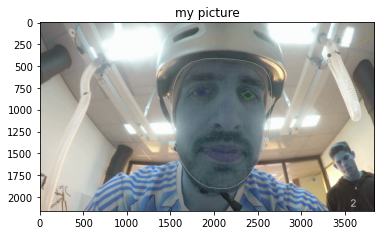

In [5]:
cap = cv2.VideoCapture("generateData_OUTPUT/GOPR1124_Trim_trainingsData.mp4") #video_name is the video being called
cap.set(1,1); # Where frame_no is the frame you want

ret, frame = cap.read() # Read the frame
#gray = cv2.cvtColor(frame, cv2.COLOR_BAYER_BG2BGR)

plt.imshow(frame)
plt.title('my picture')
plt.show()

In [6]:
cycleData = pd.read_csv("dataset bike/220316_1023_JOS.csv", sep=";")
cycleData.head()

,StageIndex,idTime,idDistance,idRevolutions,idWork,idCadence,idHeartrate,idSpeed,idTransmission,idPedalForce,idPower,idInclination,idWorkPerBeat
0,0,0,0,0,0,57,85,"30,8","9,01",46,47,"-1,58",33
1,0,505,4,0,0,60,85,"32,5","9,01",47,50,"-1,80",35
2,0,1009,9,1,0,61,85,"33,1","9,01",46,50,"-1,89",35
3,0,1513,14,2,0,61,85,"33,2","9,01",46,50,"-1,92",35
4,0,2017,18,2,0,62,85,"33,5","9,01",45,50,"-1,97",35


In [7]:

maxhr = max(cycleData["idHeartrate"])
cycleData['heartRateZone'] = cycleData.apply(
    lambda row: 5 if (row.idHeartrate > (maxhr * 0.9)) else (
    4 if (row.idHeartrate > (maxhr * 0.8)) else (
    3 if (row.idHeartrate > (maxhr * 0.7)) else (
    2 if (row.idHeartrate > (maxhr * 0.6)) else (
    1 if (row.idHeartrate > (maxhr * 0.5)) else (0))))) , axis=1)

In [10]:
cycleData.head(100)

,StageIndex,idTime,idDistance,idRevolutions,idWork,idCadence,idHeartrate,idSpeed,idTransmission,idPedalForce,idPower,idInclination,idWorkPerBeat,heartRateZone
0,0,0,0,0,0,57,85,"30,8","9,01",46,47,"-1,58",33,0
1,0,505,4,0,0,60,85,"32,5","9,01",47,50,"-1,80",35,0
2,0,1009,9,1,0,61,85,"33,1","9,01",46,50,"-1,89",35,0
3,0,1513,14,2,0,61,85,"33,2","9,01",46,50,"-1,92",35,0
4,0,2017,18,2,0,62,85,"33,5","9,01",45,50,"-1,97",35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,47898,468,52,3,66,111,"35,6","9,01",60,70,"-2,01",38,1
96,1,48402,473,52,3,66,111,"35,5","9,01",60,70,"-2,00",38,1
97,1,48906,478,53,3,65,112,"35,3","9,01",60,70,"-1,96",38,1
98,1,49410,483,54,3,64,112,"34,8","9,01",61,70,"-1,88",38,1
